In [128]:
# importing core libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [49]:
# reading selected dataframe
df = pd.read_csv('https://raw.githubusercontent.com/angelsalazar/MNA_Challenge/main/datasets/cleaned_data.csv', encoding='latin-1')
df.head()

,Unnamed: 0,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,...,1,1,1,1,1,1,1,1,1,1
1,1,DLAGU6516,POZO R013 CAÃADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,...,1,1,1,1,1,1,1,1,1,1
2,2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,...,1,1,1,0,1,1,1,1,1,1
3,3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,...,1,1,1,1,1,1,1,1,1,1
4,4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,...,1,1,0,1,1,1,1,1,1,1


In [50]:
# droping unexpected column
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1054 non-null   object 
 1   SITIO                 1054 non-null   object 
 2   ORGANISMO_DE_CUENCA   1054 non-null   object 
 3   ESTADO                1054 non-null   object 
 4   MUNICIPIO             1054 non-null   object 
 5   ACUIFERO              1054 non-null   object 
 6   SUBTIPO               1054 non-null   object 
 7   LONGITUD              1054 non-null   float64
 8   LATITUD               1054 non-null   float64
 9   ALC_mg/L              1054 non-null   float64
 10  CALIDAD_ALC           1054 non-null   object 
 11  CONDUCT_mS/cm         1054 non-null   float64
 12  CALIDAD_CONDUC        1054 non-null   object 
 13  SDT_M_mg/L            1054 non-null   float64
 14  CALIDAD_SDT_ra        1054 non-null   object 
 15  CALIDAD_SDT_salin    

In [52]:
# displaying existing values in the column SEMAFORO
df['SEMAFORO'].value_counts()

Verde       427
Rojo        382
Amarillo    245
Name: SEMAFORO, dtype: int64

The previous challenge was useful to determine that the water quality is denoted by the following columns:

* ALC_mg/L
* CONDUCT_mS/cm
* SDT_M_mg/L
* FLUORUROS_mg/L
* DUR_mg/L
* COLI_FEC_NMP/100_mL
* N_NO3_mg/L
* AS_TOT_mg/L
* CD_TOT_mg/L
* CR_TOT_mg/L
* HG_TOT_mg/L
* PB_TOT_mg/L
* MN_TOT_mg/L
* FE_TOT_mg/L

if the values recorded for each column do not exceed a certain threshold, the water quality can be labeled as best (Green / 3), regular (Yellow / 2), and worst (Red / 1).

The columns listed above will be considered as the independent features that will be used to predict water quality.


In [53]:
featureNames = [
    'ALC_mg/L',
    'CONDUCT_mS/cm',
    'SDT_M_mg/L',
    'FLUORUROS_mg/L',
    'DUR_mg/L',
    'COLI_FEC_NMP/100_mL',
    'N_NO3_mg/L',
    'AS_TOT_mg/L',
    'CD_TOT_mg/L',
    'CR_TOT_mg/L',
    'HG_TOT_mg/L',
    'PB_TOT_mg/L',
    'MN_TOT_mg/L',
    'FE_TOT_mg/L'
]

In [81]:
# defining independant and dependant feature
X = df[featureNames]
y = df['SEMAFORO']

In [82]:
Y = label_binarize(y, classes = ['Verde', 'Amarillo', 'Rojo'])

In [83]:
# creating training and testing subsets
# 20% of the dataset will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Feature importance using RandomForestRegressor



In [84]:
# creating instance of RandomForestRegressor
pipe = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor())])

In [85]:
# training model
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestRegressor())])

In [86]:
# getting computed feature importance
pipe['rf'].feature_importances_

array([0.01302313, 0.01903208, 0.00376616, 0.21264158, 0.1824024 ,
       0.11995637, 0.12898956, 0.09776812, 0.00609465, 0.02397947,
       0.00600631, 0.02232367, 0.08194264, 0.08207387])

<BarContainer object of 14 artists>

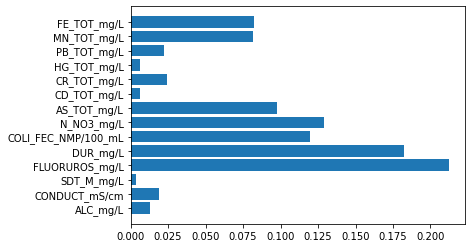

In [87]:
# floting featue importance
plt.barh(featureNames, pipe['rf'].feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

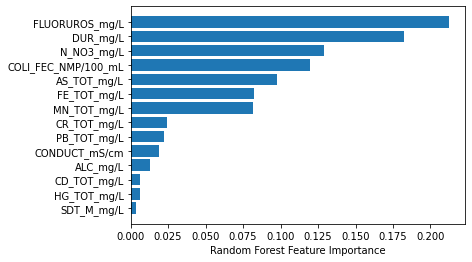

In [88]:
# sorting feature importance
sorted_idx = pipe['rf'].feature_importances_.argsort()
# ploting feature importance DESC
plt.barh(np.array(featureNames)[sorted_idx], pipe['rf'].feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

the figure displayed above shows that the `FLUORUROS_mg/L` column is the most relevant feature.

For simplicity purposes, only the top 5 features will be selected to train predictive models.

In [89]:
# defining most relevant features
mostRelevantFeatures = [
    'FLUORUROS_mg/L',
    'DUR_mg/L',
    'N_NO3_mg/L',
    'COLI_FEC_NMP/100_mL',
    'AS_TOT_mg/L'
];

In [90]:
# defining selected independent variables
X = df[mostRelevantFeatures]

In [91]:
# recreating training and testing subsets
# 30% of the dataset will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Decision Tree vs Random Forest


In [98]:
def matchup(models, targetsNames):
  classifierMetadatasByName = {}

  for name, model in models:
    print(name)
    print('Regular training')
    
    # regular training
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    print(classification_report(y_test, y_pred, target_names=targetsNames, zero_division = 1))
    print('Cross validation training')
    # fold generator
    kfold = KFold(n_splits=3, shuffle=True, random_state=90210)
    # cross validation training
    # for more information regarding scoring
    # visit the following link https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    cv_scores = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'accuracy')
    print(f'accuracy \t {np.mean(cv_scores)}')
    print('\n')
    metadata = {}
    metadata['classifier'] = clf
    metadata['y_pred'] = y_pred
    classifierMetadatasByName[name] = metadata
  return classifierMetadatasByName

In [103]:
models = [
  ('DecisionTreeClassifier', Pipeline([('scaler', StandardScaler()), ('DecisionTreeClassifier', DecisionTreeClassifier())]) ),
  ('RandomForestClassifier', Pipeline([('scaler', StandardScaler()), ('RandomForestClassifier', RandomForestClassifier())]) )
]

labels = ['Verde', 'Amarillo', 'Rojo']
classifierMetadatasByName = matchup(models, labels)

DecisionTreeClassifier
Regular training
              precision    recall  f1-score   support

       Verde       0.77      0.77      0.77        87
    Amarillo       0.69      0.64      0.66        55
        Rojo       0.88      0.93      0.90        69

   micro avg       0.79      0.79      0.79       211
   macro avg       0.78      0.78      0.78       211
weighted avg       0.78      0.79      0.78       211
 samples avg       0.79      0.79      0.79       211

Cross validation training
accuracy 	 0.8315539739027283


RandomForestClassifier
Regular training
              precision    recall  f1-score   support

       Verde       0.78      0.92      0.85        87
    Amarillo       0.91      0.58      0.71        55
        Rojo       0.98      0.94      0.96        69

   micro avg       0.87      0.84      0.86       211
   macro avg       0.89      0.81      0.84       211
weighted avg       0.88      0.84      0.85       211
 samples avg       0.88      0.84      0.84    

Based on the metrics displayed above, the RandomForestClassifier is the most effective out of the two trained models.

The accuracy reported for RandomForestClassifier is **86.3%** when trained using the cross-validation method which uses different portions of the data to test and train a model on different iterations. 

## Plotting Precision-Recall


In [109]:
# utilitary method

def plotAvgPrecisionRecall(title, y_score):
  precision = dict()
  recall = dict()
  average_precision = dict()
  n_classes = Y.shape[1]

  for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

  # A "micro-average": quantifying score on all classes jointly
  precision["micro"], recall["micro"], _ = precision_recall_curve(
      y_test.ravel(), y_score.ravel()
  )
  average_precision["micro"] = average_precision_score(y_test, y_score, average="micro")

  display = PrecisionRecallDisplay(
      recall=recall["micro"],
      precision=precision["micro"],
      average_precision=average_precision["micro"],
  )
  display.plot()
  _ = display.ax_.set_title(f"{title} - Micro-averaged over all classes")

### DecisionTreeClassifier

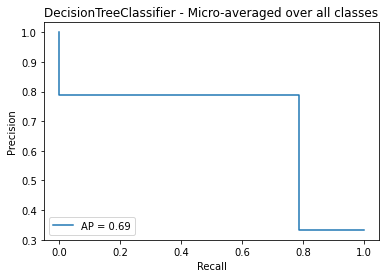

In [110]:
plotAvgPrecisionRecall('DecisionTreeClassifier', classifierMetadatasByName['DecisionTreeClassifier']['y_pred'])

### RandomForestClassifier

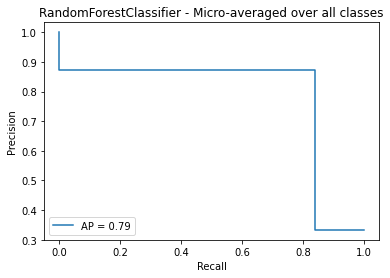

In [111]:
plotAvgPrecisionRecall('RandomForestClassifier', classifierMetadatasByName['RandomForestClassifier']['y_pred'])

## Plotting confusion matrix

In [133]:
# make_confusion_matrix has been retrieved from the following repository
# https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [134]:
# utilitary method
def plotConfusionMatrix(y_pred):
  cf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
  make_confusion_matrix(cf_matrix)

### DecisionTreeClassifier

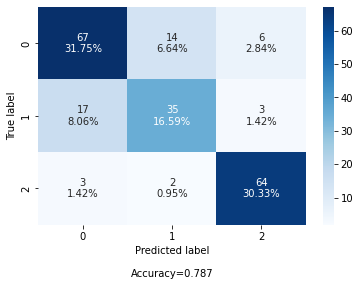

In [131]:
plotConfusionMatrix(classifierMetadatasByName['DecisionTreeClassifier']['y_pred'])

### RandomForestClassifier

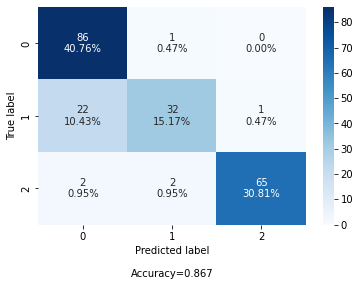

In [132]:
plotConfusionMatrix(classifierMetadatasByName['RandomForestClassifier']['y_pred'])

## Challenge report

the challenge report can be found on link below

https://docs.google.com/presentation/d/1Bg3gNSuFEEjFUzBkwLtPK9i1TnPSprixqfnKcK9MAc0/
